## Hackathon Task



![Idai.jpeg](attachment:Idai.jpeg)



On March 13th of 2019, Cyclone Idia made landfall in Mozambique and was one of the worst recorded tropical cyclones to affect Africa and the Southern-Hemisphere. Within the _task data_ folder, you will find satellite imagery data from the Sentinel satellite for an area over Mozambique affected by flooding. The data comprises of six images spanning a time frame from the 13th to the 26th of March. Your task is to perform a flood detection analysis using this dataset.

When performing the analysis, attempt to answer the following questions:

- What part of the image did you choose to use as your training set and why? Show a plot of your training set.
<p style="color:blue">since we want to identify water we picked a part of the image from the day before the flood that has clearly a portion of water and land so that the model is well trained on identifying water or land structure.</p>
    
    
    
    
- What part of the image did you choose to use as your test set and why?
<p style="color: blue">We picked a part of the image that was not used to train the model</p>
- How many segments did you choose to use during the image segmentation process?
<p style="color: blue">50000 segments</p>
- How many clusters did you choose to use when applying the k-means clustering technique?
<p style="color:blue">3 clusters</p>


Try to produce the following plots:

- Show plots of the images (the whole image or the same portion thereof) over the six days after the clustering method has been applied.
<p style="color:blue">Done</p>
- Show plots of the progression of the flooded regions over the six days? That is, show the difference in water coverage from one day to the next.
<p style="color:blue">Done</p>


Some additional questions:

- Does the amount of vegetation cover affect the severity of the flooding? - on hold
- What is the affect of not having data for some of the days in between those provided? Can you estimate the amount of flooding for days on which you do not have data?
<p style="color:blue">Done</p>

An additional challenge:

Can you calculate the area/percentage of the image that is covered by water? How does this change over the six days? 
<p style="color:blue">Done</p>

## Load important libraries 

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import cluster, preprocessing
from sklearn.linear_model import LinearRegression
import sklearn

from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
# from skimage.color import gray2rgba
import skimage.color as sc
import pandas as pd
import scipy as sp
import glob

In [24]:
# dir(cluster)

In [2]:
# print(dir(sc))

In [94]:
def load_data(filename):
    
    im=np.load(filename)
    
    return im

## Load the data

In [95]:
flood_data = glob.glob('data/*.npy')
flood_data.sort()
print(flood_data)


['data/20190313T161522.npy', 'data/20190314T030905.npy', 'data/20190319T161451.npy', 'data/20190320T030813.npy', 'data/20190325T161548.npy', 'data/20190326T030905.npy']


In [96]:
day1 = load_data(flood_data[0])
day2 = load_data(flood_data[1])
day6 = load_data(flood_data[2])
day7 = load_data(flood_data[3])
day12 = load_data(flood_data[4])
day13 = load_data(flood_data[5])

In [170]:
day1_ir.shape

(4024, 3745, 2)

In [97]:
# convert the images from 1 chanell to 3 channel
day1 = sc.gray2rgb(day1[:,:,0])
day2 = sc.gray2rgb(day2[:,:,0])
day6 = sc.gray2rgb(day6[:,:,0])
day7 = sc.gray2rgb(day7[:,:,0])
day12 = sc.gray2rgb(day8[:,:,0])
day13 = sc.gray2rgb(day9[:,:,0])

In [7]:
day1.shape

(4024, 3745, 3)

## Visualise the data

In [29]:
# f = plt.figure(figsize=(12,12))
# # plt.imshow(day1[0:1000,0:2000,0],'viridis')

# f.add_subplot(131)

# # plt.imshow(day1[0:1000,400:1400,0],'viridis')
# plt.imshow(day1[1500:3000,500:2500,1],'viridis')
# plt.title('day1 - zoom - vv')

# plt.show()

Text(0.5, 1.0, 'day1 - zoom - vv')

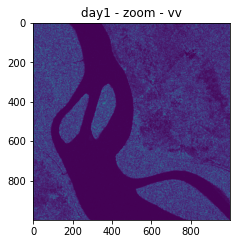

In [98]:
## training image
f = plt.figure(figsize=(12,12))
day1_training=day1[500:1500,1000:2000,:]
f.add_subplot(131)
plt.imshow(day1_training[:,:,0],'viridis')
plt.title('day1 - zoom - vv')

In [99]:
# [400:1400,800:1800,:]
day1_test= day1[1500:3000,500:2500,:]
day2_test= day2[1500:3000,500:2500,:]
day6_test= day6[1500:3000,500:2500,:]
day7_test= day7[1500:3000,500:2500,:]
day12_test= day12[1500:3000,500:2500,:]
day13_test= day13[1500:3000,500:2500,:]

## Segmentation

In [100]:
number_segments=50000
segments = slic(day1_training, n_segments=number_segments, compactness=.01, sigma = 0, convert2lab=False)

In [101]:
day1_training[:,:,0].max()

0.20082148909568787

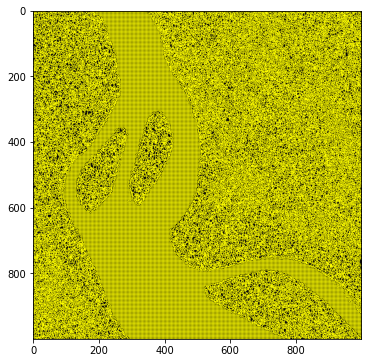

In [102]:
f = plt.figure(figsize=(20,20))
f.add_subplot(131)
plt.imshow(mark_boundaries(day1_training[:,:,0], segments))
plt.show()

In [103]:
def calculate_segment_stats(data, segments):
    
    # turn the image into a 2D array (pix by channel)
    d1_flat = pd.DataFrame(np.ravel(data).reshape((-1,3)))

    # add the label vector
    d1_flat['spID'] = np.ravel(segments)

    
    print(d1_flat)
    
    # calculate the mean by segment
    return d1_flat.groupby('spID').mean().values

               0         1         2   spID
0       0.024473  0.024473  0.024473      0
1       0.023194  0.023194  0.023194      0
2       0.025895  0.025895  0.025895      0
3       0.024934  0.024934  0.024934      0
4       0.031564  0.031564  0.031564      0
...          ...       ...       ...    ...
999995  0.032833  0.032833  0.032833  43906
999996  0.019319  0.019319  0.019319  44096
999997  0.005873  0.005873  0.005873  44096
999998  0.004752  0.004752  0.004752  44096
999999  0.004534  0.004534  0.004534  44096

[1000000 rows x 4 columns]


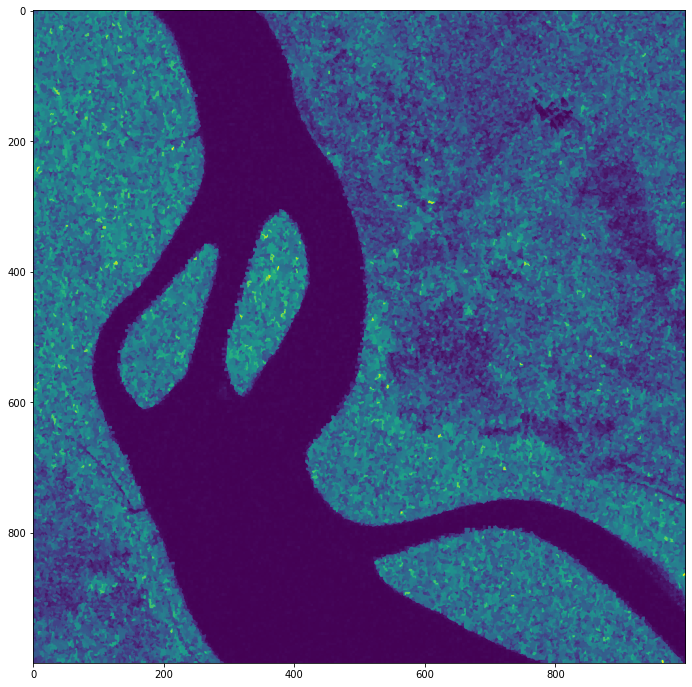

In [104]:
seg_means = calculate_segment_stats(day1_training,segments)
plt.figure(figsize=(12,12))
# broadcast the mean pixel values from the first channel
# to the same shape as the original image array
plt.imshow(seg_means[:,0][segments])

In [62]:
seg_means.shape

(44099, 3)

## Clustering

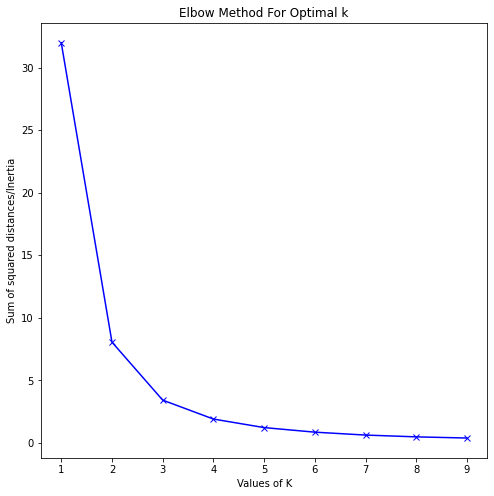

In [105]:
sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = cluster.KMeans(n_clusters=num_clusters)
 kmeans.fit(seg_means)
 sum_of_squared_distances.append(kmeans.inertia_)
plt.figure(figsize=(8,8))
plt.plot(K,sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [106]:
kmeans_3clusters=cluster.KMeans(n_clusters=3)
kmeans_3clusters.fit(seg_means)

KMeans(n_clusters=3)

In [18]:
# # dir(cluster)\
# # Fit Affinity Propagation with Scikit
# afprop = cluster.AffinityPropagation(max_iter=5)
# afprop.fit(seg_means)
# cluster_centers_indices = afprop.cluster_centers_indices_
# n_clusters_ = len(cluster_centers_indices)
# print(n_clusters_)
# # Predict the cluster for all the samples
# # P = afprop.predict(X)

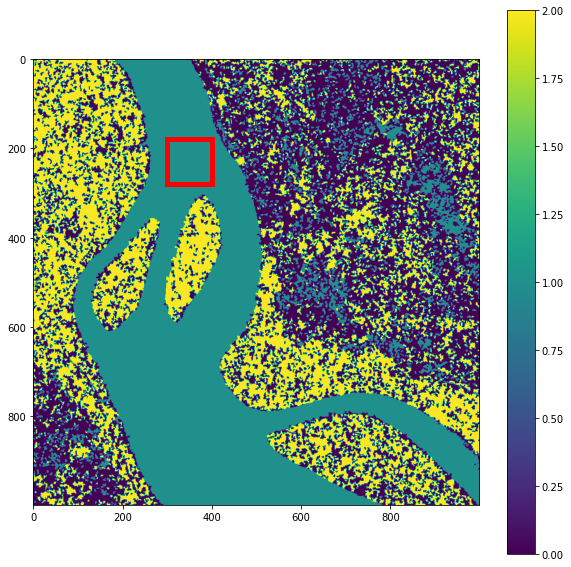

In [107]:
# this is the bit that displays the figure:
plt.figure(figsize=(10,10))
plt.imshow(kmeans_3clusters.labels_[segments],'viridis')
plt.colorbar()

# this is the bit that adds the rectangle:
rect = mpl.patches.Rectangle((300,180),100,100,linewidth=5,edgecolor='r',facecolor='none')
ax = plt.gca()
ax.add_patch(rect)

## using the data

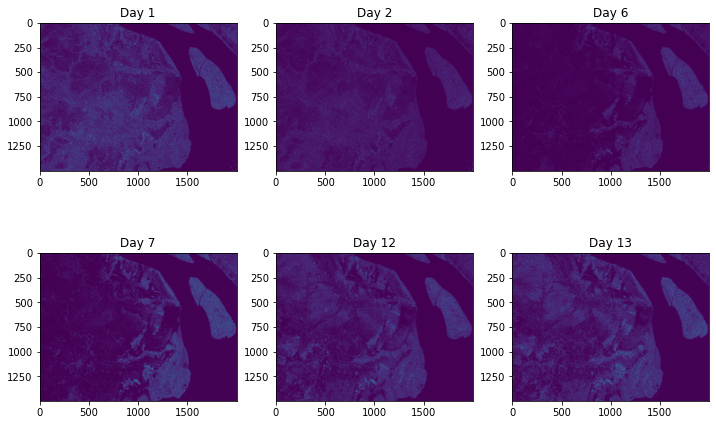

In [108]:
f = plt.figure(figsize=(12,12))

f.add_subplot(331)
plt.imshow(day1_test[:,:,1])
plt.title("Day 1")

f.add_subplot(332)
plt.imshow(day2_test[:,:,1])
plt.title("Day 2")

f.add_subplot(333)
plt.imshow(day6_test[:,:,1])
plt.title("Day 6")

f.add_subplot(131)
plt.imshow(day7_test[:,:,1])
plt.title("Day 7")

f.add_subplot(132)
plt.imshow(day12_test[:,:,1])
plt.title("Day 12")

f.add_subplot(133)
plt.imshow(day13_test[:,:,1])
plt.title("Day 13")


plt.show()

In [109]:
# y, x
# [200:300,500:600]
training = kmeans_3clusters.labels_[segments][150:250,300:400]
water_label = int(sp.stats.mode(training, axis=None).mode)
print('The water label is: ',water_label)

The water label is:  1


In [110]:
def detect(data, model, number_segments=number_segments):
    
    """ 
    Function to return labelled image
    """
    
    # segment the image
    test_segments = slic(data,
                         n_segments=number_segments,
                         compactness=50,
                         sigma = 0,
                         convert2lab=False)
    
    # calculate seg stats 
    test_set = calculate_segment_stats(data,test_segments)
    
    # predict
    test_set_segment_labels=model.predict(test_set)
    
    # code via broadcasting
    return test_set_segment_labels[test_segments]

In [111]:
day1_labels=detect(day1_test,kmeans_3clusters)
day2_labels=detect(day2_test,kmeans_3clusters)
day6_labels=detect(day6_test,kmeans_3clusters)
day7_labels=detect(day7_test,kmeans_3clusters)
day12_labels=detect(day12_test,kmeans_3clusters)
day13_labels=detect(day13_test,kmeans_3clusters)

                0         1         2   spID
0        0.020153  0.020153  0.020153      0
1        0.021588  0.021588  0.021588      0
2        0.022590  0.022590  0.022590      0
3        0.022163  0.022163  0.022163      0
4        0.020847  0.020847  0.020847      0
...           ...       ...       ...    ...
2999995  0.001582  0.001582  0.001582  46980
2999996  0.001272  0.001272  0.001272  46980
2999997  0.000920  0.000920  0.000920  46980
2999998  0.000570  0.000570  0.000570  46980
2999999  0.001093  0.001093  0.001093  46980

[3000000 rows x 4 columns]
                0         1         2   spID
0        0.016583  0.016583  0.016583      0
1        0.019564  0.019564  0.019564      0
2        0.021925  0.021925  0.021925      0
3        0.023821  0.023821  0.023821      0
4        0.022766  0.022766  0.022766      0
...           ...       ...       ...    ...
2999995  0.001840  0.001840  0.001840  46982
2999996  0.001091  0.001091  0.001091  46982
2999997  0.002215  0.002215

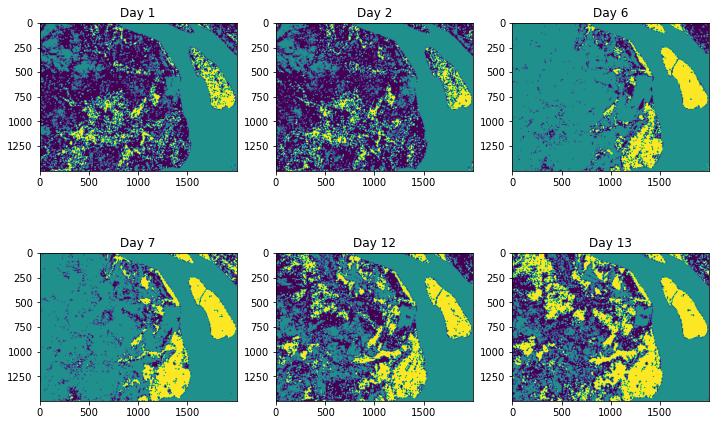

In [112]:
f = plt.figure(figsize=(12,12))

f.add_subplot(331)
plt.imshow(day1_labels)
plt.title("Day 1")

f.add_subplot(332)
plt.imshow(day2_labels)
plt.title("Day 2")

f.add_subplot(333)
plt.imshow(day6_labels)
plt.title("Day 6")

f.add_subplot(131)
plt.imshow(day7_labels)
plt.title("Day 7")

f.add_subplot(132)
plt.imshow(day12_labels)
plt.title("Day 12")

f.add_subplot(133)
plt.imshow(day13_labels)
plt.title("Day 13")


plt.show()

In [113]:
day1_water = day1_labels==water_label
day2_water = day2_labels==water_label
day6_water = day6_labels==water_label
day7_water = day7_labels==water_label
day12_water = day12_labels==water_label
day13_water = day13_labels==water_label

In [114]:
def count_water(flooded):
    true_v = np.count_nonzero(flooded == True)
    false_v = np.count_nonzero(flooded == False)
    total = true_v + false_v
    return (true_v/total) * 100

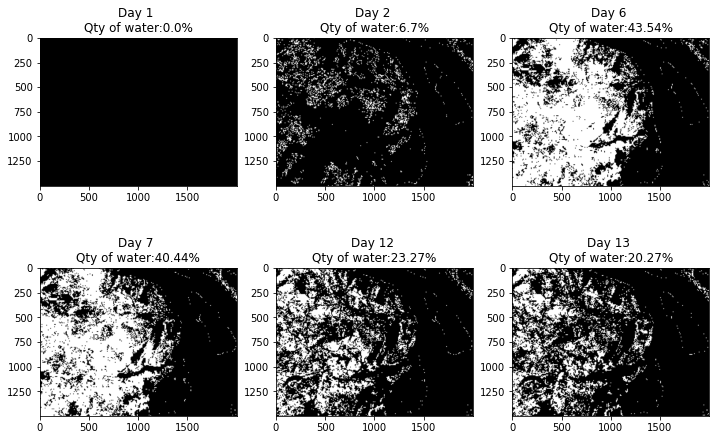

In [116]:
# flooding = np.logical_xor(day1_water,day6_water)
# plt.figure(figsize=(10,10))
# plt.imshow(flooding, 'binary_r')
# plt.title('Flooded areas on 22/09/2017')
# plt.show()


flooding_day1 = np.logical_xor(day1_water,day1_water)
flooding_day2 = np.logical_xor(day1_water,day2_water)
flooding_day6 = np.logical_xor(day1_water,day6_water)
flooding_day7 = np.logical_xor(day1_water,day7_water)
flooding_day12 = np.logical_xor(day1_water,day12_water)
flooding_day13 = np.logical_xor(day1_water,day13_water)
f = plt.figure(figsize=(12,12))

f.add_subplot(331)
plt.imshow(flooding_day1,'binary_r')
plt.title("Day 1 \nQty of water:"+ str(round(count_water(flooding_day1),2)) + "%")

f.add_subplot(332)
plt.imshow(flooding_day2,'binary_r')
plt.title("Day 2 \nQty of water:"+ str(round(count_water(flooding_day2),2)) + "%")

f.add_subplot(333)
plt.imshow(flooding_day6,'binary_r')
plt.title("Day 6 \nQty of water:"+ str(round(count_water(flooding_day6),2)) + "%")

f.add_subplot(131)
plt.imshow(flooding_day7,'binary_r')
plt.title("Day 7 \nQty of water:" + str(round(count_water(flooding_day7),2)) + "%")

f.add_subplot(132)
plt.imshow(flooding_day12,'binary_r')
plt.title("Day 12 \nQty of water:"+ str(round(count_water(flooding_day12),2)) + "%")

f.add_subplot(133)
plt.imshow(flooding_day13,'binary_r')
plt.title("Day 13 \nQty of water:"+ str(round(count_water(flooding_day13),2)) + "%")


plt.show()

In [72]:
# np.count_nonzero(flooding_day6 == True)
# # flooding_day6.shape
# count_water(flooding_day8)

In [76]:
# day = [1,2,6,7,8,9]
# water = [round(count_water(flooding_day1),2),round(count_water(flooding_day2),2),round(count_water(flooding_day6),2),round(count_water(flooding_day7),2),round(count_water(flooding_day8),2),round(count_water(flooding_day9),2)]
  
# plt.plot(day,water)
# plt.title('Days Vs Perc. of Water')
# plt.xlabel('Days')
# plt.ylabel('Perc. Of Water')
# plt.show()

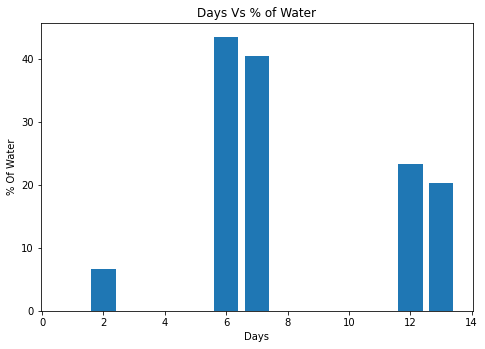

In [117]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = [1,2,6,7,12,13]
water = [round(count_water(flooding_day1),2),round(count_water(flooding_day2),2),round(count_water(flooding_day6),2),round(count_water(flooding_day7),2),round(count_water(flooding_day12),2),round(count_water(flooding_day13),2)]
ax.bar(days,water)
plt.title('Days Vs % of Water')
plt.xlabel('Days')
plt.ylabel('% Of Water')
plt.show()

In [118]:
## predict the other days
LinearRegression(fit_intercept=True, normalize=False, copy_X=True)

LinearRegression(normalize=False)

In [119]:
x = np.array(days)[2:]
y = np.array(water)[2:]

In [84]:
x

array([ 6,  7, 12, 13])

In [120]:
print(np.reshape(x,(-1,1)))
print(np.reshape(y,(-1,1)))

[[ 6]
 [ 7]
 [12]
 [13]]
[[43.54]
 [40.44]
 [23.27]
 [20.27]]


In [121]:
model = LinearRegression().fit(np.reshape(x,(-1,1)), y)

In [122]:
x_test = np.array([8,9,10,11,14])
y_pred = model.predict(np.reshape(x_test,(-1,1)))

In [123]:
y_pred

array([36.92202703, 33.56067568, 30.19932432, 26.83797297, 16.75391892])

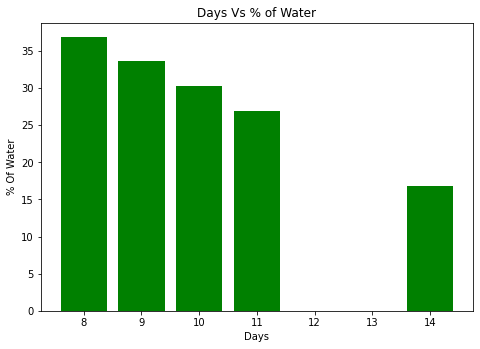

In [124]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
days = x_test
water = y_pred
ax.bar(days,water,color='green')
plt.title('Days Vs % of Water')
plt.xlabel('Days')
plt.ylabel('% Of Water')
plt.show()